In [6]:
import scipy.linalg as linalg
import numpy as np
np.set_printoptions(precision=1)

## Normed Vector Spaces
````{prf:definition}
A normed vector space is a vector space $\mathcal{V}$ with a
function $\lVert\cdot\rVert:\mathcal{V}\rightarrow \mathbb{R}_+$, called **norm**, satisfying the following properties for all $\vvec{v},\vvec{w}\in\mathcal{V}$ and $\alpha\in\mathbb{R}$:
\begin{align*}
    \lVert \vvec{v}+\vvec{w}\rVert &\leq\lVert\vvec{v}\rVert +\lVert\vvec{w}\rVert &\text{(triangle inequality)}\\
    \lVert \alpha\vvec{v}\rVert &=\lvert\alpha\rvert\lVert\vvec{v}\rVert &\text{(homogeneity)}\\
    \lVert\vvec{v}\rVert =0&\Leftrightarrow \vvec{v}=\vvec{0}
\end{align*}
````
The norm measures the length of vectors.
````{prf:example}
The $d$-dimensional Euclidean space is the space of $\mathbb{R}^d$ with the **Euclidean norm**:
$$\lVert \vvec{v}\lVert_2 = \lVert \vvec{v}\rVert =\sqrt{\sum_{i=1}^d v_i^2}$$
```{tikz}
\begin{tikzpicture}
\begin{axis}[
    	width=.5\textwidth,
    	xmin=-0.5, xmax=2.5, % set the min and max values of the x-axis
    	axis lines=center, %set the position of the axes
    	ymin=-0.5, ymax=2.5,
    	xlabel=$x_1$, % label x axis
        ylabel=$x_2$, % label y axis
        %xtick=\empty, ytick=\empty,
        scale only axis=true,
]
\draw [-, ultra thick,  blue] (axis cs:0,0) -- (axis cs:1.5,0) node[below]{$v_1$};
\draw [-, ultra thick,  blue] (axis cs:1.5,0) -- (axis cs:1.5,2) node[right]{$v_2$};
\draw [->, ultra thick,  magenta] (axis cs:0,0) -- (axis cs:1.5,2) node[left]{$\mathbf{v}$};


\end{axis}
\end{tikzpicture}
```
The Euclidean norm computes the length of a vector by means of the Pythagorean theorem:
$$\lVert \vvec{v}\rVert^2 = v_1^2 + v_2^2$$
````

The Euclidean norm introduces a geometric interpretation of the inner product of two vectors. The inner product is defined by the lengths of the vectors and the cosine of the angle between them.
\begin{align*}
    \vvec{v}^\top\vvec{w} = \sum_{i=1}^dv_iw_i
    = \cos\sphericalangle(\vvec{v},\vvec{w})\lVert\vvec{v}\rVert\lVert\vvec{w}\rVert
\end{align*}
```{tikz}
\pgfplotsset{compat=newest}
\begin{tikzpicture}[dot/.style={circle,inner sep=1pt,fill,label={#1},name=#1},
  extended line/.style={shorten >=-#1,shorten <=-#1},
  extended line/.default=1cm]
 \draw[-stealth] (-0.5,0) -- (4,0);
 \draw[-stealth] (0,-0.5) -- (0,3.5);
 \coordinate (O) at (0,0);
 \coordinate (Y) at (3,1);
 \coordinate (X) at (1, 3);
 \draw [-stealth,ultra thick,blue] (O) -- (Y) node[above,blue]{$\mathbf{w}$};     
 \draw [ -stealth,ultra thick,magenta] (O) -- (X) node[above,magenta]{$\mathbf{v}$}; 
 \pic [draw, -,angle radius=12mm, angle eccentricity=.8] {angle = Y--O--X};
 \node at (0.5,0.5) {$\phi$};
\end{tikzpicture}
```
In Machine Learning, the inner product is often used as a similarity measure between two points. The idea is that two points facing in the same direction have a cosine close to one, and hence a larger inner product than two points looking into distint directions.
If two vectors are **orthogonal**, then $\cos\sphericalangle(\vvec{v},\vvec{w})=0$ and the inner product is zero
\begin{align*}
\vvec{v}^\top\vvec{w}
&= \cos\sphericalangle(\vvec{v},\vvec{w})\lVert\vvec{v}\rVert\lVert\vvec{w}\rVert =0
\end{align*}
     
Two vectors are called **orthonormal** if they are orthogonal and have unit norm $\lVert \vvec{v}\rVert = \lVert\vvec{w}\rVert =1$.
```{tikz}
\begin{tikzpicture}[dot/.style={circle,inner sep=1pt,fill,label={#1},name=#1},
  extended line/.style={shorten >=-#1,shorten <=-#1},
  extended line/.default=1cm]
 \draw[-stealth] (-0.5,0) -- (4,0);
 \draw[-stealth] (0,-0.5) -- (0,3.5);
 \coordinate (O) at (0,0);
 \coordinate (Y) at (3,-1);
 \coordinate (X) at (1, 3);
 %\coordinate (XN) at (2*0.4,4*0.4);
 \draw [-stealth,ultra thick,blue] (O) -- (Y) node[above,blue]{$\mathbf{w}$};     
 \draw [ -stealth,ultra thick,magenta] (O) -- (X) node[above,magenta]{$\mathbf{v}$}; 
\pic [draw, -, angle radius=12mm, angle eccentricity=.8] {angle = Y--O--X};
\node at (0.6,0.3) {$\frac{\pi}{2}$};
\end{tikzpicture}
```
(lina_projection)=
````{prf:theorem}
The inner product of a vector $\vvec{v}$ and a normalized vector $\frac{\vvec{w}}{\lVert\vvec{w}\rVert}$ computes the length of the **projection** $\vvec{p_v}$ of $\vvec{v}$ onto $\vvec{w}$. Using the notation of vectors from the image below, we have
\begin{align*}
\lVert\vvec{p}_v\rVert = \vvec{v}^\top \frac{\vvec{w}}{\lVert\vvec{w}\rVert}
\end{align*}
```{tikz}
\begin{tikzpicture}[dot/.style={circle,inner sep=1pt,fill,label={#1},name=#1},
  extended line/.style={shorten >=-#1,shorten <=-#1},
  extended line/.default=1cm]
 \draw[-stealth] (-0.5,0) -- (4,0);
 \draw[-stealth] (0,-0.5) -- (0,3.5);
 \coordinate (O) at (0,0);
 \coordinate (Y) at (3,1);
 \coordinate (X) at (1, 3);
 %\coordinate (XN) at (2*0.4,4*0.4);
 \draw [-stealth,ultra thick,blue] (O) -- (Y) node[above,blue]{$\mathbf{w}$};     
 \draw [ -stealth,ultra thick,magenta] (O) -- (X) node[above,magenta]{$\mathbf{v}$}; 
 %\draw [ -stealth,ultra thick,green] (O) -- (XN) node[above left,green]{$\frac{\mathbf{x}}{\lVert\mathbf{x}\rVert}$}; 
 \draw[dashed] (X) --  node[midway,above left]{} ($(O)!(X)!(Y)$) coordinate (PX) node[below left]{};
 \draw[ultra thick, green,-stealth] (O) -- (PX) node[below right,green]{$\mathbf{p}_v$}  ;
 %\draw[thick,decorate,decoration={brace,raise=10pt,mirror}] (O) -- (PX) node[midway, below right=2pt]{$c=\cos(\phi)\lVert\vvec{x}\rVert$};
\pic [draw, -,angle radius=12mm, angle eccentricity=.8] {angle = Y--O--X};
 \node at (0.5,0.5) {$\phi$};
\end{tikzpicture}
```
````
```{prf:proof}
From the definition of the cosine in a triangle follows that
\begin{align*}
\cos(\phi)= \frac{\lVert\vvec{p}_v\rVert}{\lVert \vvec{v}\rVert} 
&\Leftrightarrow \lVert \vvec{p}_v\rVert =\cos(\phi)\lVert \vvec{v}\rVert =\vvec{v}^\top \frac{\vvec{w}}{\lVert \vvec{w}\rVert} 
\end{align*}
```
````{prf:example} Manhattan norm
The Manhattan norm is defined as:
$$\lVert \vvec{v}\lVert_1 = \lvert \vvec{v}\rvert =\sum_{i=1}^d \lvert v_i\rvert$$
The Manhattan norm computes the length of a vector coordinate-wise:
$$\lvert \vvec{v}\rvert = \lvert v_1\rvert + \lvert v_2\rvert$$
```{tikz}
\begin{tikzpicture}
\begin{axis}[
    	width=.5\textwidth,
    	xmin=-0.5, xmax=2.5, % set the min and max values of the x-axis
    	axis lines=center, %set the position of the axes
    	ymin=-0.5, ymax=2.5,
    	xlabel=$x_1$, % label x axis
        ylabel=$x_2$, % label y axis
        %xtick=\empty, ytick=\empty,
        scale only axis=true,
]
\draw [-, ultra thick,  blue] (axis cs:0,0) -- (axis cs:1.5,0) node[below]{$v_1$};
\draw [-, ultra thick,  blue] (axis cs:1.5,0) -- (axis cs:1.5,2) node[right]{$v_2$};
\draw [->, ultra thick,  magenta] (axis cs:0,0) -- (axis cs:1.5,2) node[left]{$\mathbf{v}$};


\end{axis}
\end{tikzpicture}
```
````
````{prf:example} $L_p$-norms
For $p\in[1,\infty]$, the function $\lVert\cdot\rVert_p$ is a norm, where
\begin{align*}
    \lVert \vvec{v}\lVert_p & =\left(\sum_{i=1}^d \lvert v_i\rvert^p\right)^{1/p}
\end{align*}

The two-dimensional circles $\{\vvec{v}\in\mathbb{R}^2\vert \lVert\vvec{v}\rVert_p =1\}$ look as follows:
```{tikz}
% Unit circle plot style
\pgfplotsset{unit circle/.style={width=5cm,height=5cm,axis lines=middle,xtick=\empty,ytick=\empty,axis equal,enlargelimits,xmax=1,ymax=1,xmin=-1,ymin=-1,domain=0:pi/2}}

\begin{tikzpicture}
\coordinate (prev); % Store previous plot position
\foreach \p / \t in {2/1, 1/2, 0.0001/\infty} { % Loop through the plots to draw
    % \p is the exponent in the function to plot
    % \t is the p parameter to print
    \begin{axis}[at={(prev)},unit circle,anchor=west]
        \foreach \ss in {1,-1} {
        \foreach \cs in {1,-1} {
            \addplot[blue] ({\cs*(cos(deg(x)))^\p},{\ss*(sin(deg(x))^\p});
        }
        }
    \end{axis}
    \node[below=0.5cm, anchor=base] at (current axis.south) {$p=\t$}; % Print p
    \coordinate[right=0.5cm] (prev) at (current axis.east) ; % Set position for next plot
}
\end{tikzpicture}
```
````
So, the norm measures the length of a vector. Can we also measure the length of a matrix?

Yes, matrix norms are the same but different.

````{prf:definition} Matrix norms
We can extend the $L_p$ vector normes to the **element-wise $L_p$ matrix norms**:
\begin{align*}
    \lVert A\lVert_p & =\left(\sum_{i=1}^n\sum_{j=1}^m \lvert A_{ji}\rvert^p\right)^{1/p}
\end{align*}
Furthermore, we introduce the **operator norm**
\begin{align*}
    \lVert A\rVert_{op} &=\max_{\lVert \vvec{v}\rVert=1} \lVert Av\rVert 
\end{align*}
````
````{prf:definition} Trace
The **trace** sums the elements on the diagonal of a matrix.
Let $A\in\mathbb{R}^{n\times n}$, then
$$\tr(A) = \sum_{i=1}^n A_{ii}$$
    
1. $\tr(cA+B)=c\tr(A)+\tr(B)$ (linearity)
2. $\tr(A^\top)=\tr(A)$
3. $\tr(ABCD)=\tr(BCDA)=\tr(CDAB)=tr(DABC)$ (cycling property)
````
For any vector $\vvec{v}\in\mathbb{R}^d$ and matrix $A\in\mathbb{R}^{n\times d}$, we have 
\begin{align*}
    \lVert\mathbf{v}\rVert^2 &=  \mathbf{v}^\top \mathbf{v} = \tr(\mathbf{v}^\top \mathbf{v})
    &\lVert A\rVert^2 &=  \tr(A^\top A)
\end{align*}
From this property derive the **binomial formulas** of vectors and matrices:
\begin{align*}
    \lVert \vvec{x}-\vvec{y}\rVert^2 &= ( \vvec{x}-\vvec{y})^\top(\vvec{x}-\vvec{y}) = \lVert\vvec{x}\rVert^2 -2\langle\vvec{x},\vvec{y}\rangle +\lVert\vvec{y}\rVert^2\\
    \lVert X-Y\rVert^2 &= \tr( (X-Y)^\top(X-Y)) = \lVert X\rVert^2 -2\langle X, Y\rangle +\lVert Y\rVert^2
\end{align*}

### Orthogonal Matrices
A matrix $A$ with orthogonal columns satisfies 
\begin{align*}
    A^\top A = \diag(\lVert A_{\cdot 1}\rVert^2, \ldots, \lVert A_{\cdot d}\rVert^2)
\end{align*}
A matrix $A$ with orthonormal columns satisfies 
\begin{align*}
    A^\top A = \diag(1, \ldots, 1)
\end{align*}
A square matrix $A\in \mathbb{R}^{n\times n}$ is called **orthogonal** if
$$A^\top A = AA^\top=I$$
A vector norm $\lVert\cdot \rVert$ is called **orthogonal invariant** if for all $\vvec{v}\in\mathbb{R}^n$ and orthogonal matrices $X\in\mathbb{R}^{n\times n}$ we have
$$\lVert X\vvec{v}\rVert = \lVert \vvec{v}\rVert$$
A matrix norm $\lVert\cdot \rVert$ is called **orthogonal invariant** if for all $V\in\mathbb{R}^{n\times d}$ and orthogonal matrices $X\in\mathbb{R}^{n\times n}$ we have
$$\lVert XV\rVert = \lVert V\rVert$$


```{prf:theorem} SVD
For every matrix $X\in\mathbb{R}^{n\times p}$ there exist orthogonal matrices $U\in\mathbb{R}^{n\times n}, V\in\mathbb{R}^{p\times p}$ and $\Sigma  \in\mathbb{R}^{n\times p}$ such that
$$X= U\Sigma V^\top, \text{ where}$$
* $U^\top U= UU^\top=I_n, V^\top V=VV^\top= I_p$
* $\Sigma$ is a rectangular diagonal matrix, $\Sigma_{11}\geq\ldots\geq \Sigma_{kk}$ where $k=\min\{n,p\}$
```
The column vectors $U_{\cdot s}$ and $V_{\cdot s}$ are called **left** and **right singular vectors** and the values $\sigma_i=\Sigma_{ii}$ are called **singular values** $(1\leq i\leq l)$. 

In [7]:
A = np.random.rand(4,2)
U, σs,Vt = linalg.svd(A)
print(U.shape, σs.shape, Vt.shape)

(4, 4) (2,) (2, 2)


In [9]:
U

array([[-0.6, -0.4, -0.7, -0.2],
       [-0.6, -0.1,  0.6, -0.4],
       [-0.4,  0.9, -0.2,  0.2],
       [-0.4, -0.3,  0.2,  0.9]])

In [8]:
U@U.T

array([[ 1.0e+00,  3.8e-17,  1.4e-16,  7.6e-17],
       [ 3.8e-17,  1.0e+00,  1.2e-16,  4.4e-17],
       [ 1.4e-16,  1.2e-16,  1.0e+00, -3.3e-17],
       [ 7.6e-17,  4.4e-17, -3.3e-17,  1.0e+00]])

In [10]:
np.diag(σs)

array([[1.5, 0. ],
       [0. , 0.6]])

In [18]:
Σ = np.row_stack( (np.diag(σs),np.zeros((2,2))) )
Σ

array([[1.5, 0. ],
       [0. , 0.6],
       [0. , 0. ],
       [0. , 0. ]])

A $(n\times n)$ matrix $A=U\Sigma V^\top$ is invertible if all singular values are larger than zero. The inverse is given by
$$A^{-1} = V \Sigma^{-1} U^\top,\ \text{ where }$$
\begin{align*}
    \Sigma=\begin{pmatrix}\sigma_1 & 0 & \ldots & 0 \\
    0 & \sigma_2 &\ldots & 0\\
      &     & \ddots &\\
    0 & 0   & \ldots & \sigma_n\end{pmatrix},\qquad 
    \Sigma^{-1}=
    \begin{pmatrix}\frac{1}{\sigma_1} & 0 & \ldots & 0 \\
    0 & \frac{1}{\sigma_2} &\ldots & 0\\
      &     & \ddots &\\
    0 & 0   & \ldots & \frac{1}{\sigma_n}\end{pmatrix}
\end{align*}
Since the matrices $U$ and $V$ of the SVD are orthogonal, we have:
\begin{align*}
AA^{-1} &= U\Sigma V^\top V\Sigma^{-1} U^\top = U\Sigma \Sigma^{-1} U^\top = UU^\top = I\\
A^{-1}A &= V \Sigma^{-1} U^\top U\Sigma V^\top = V \Sigma^{-1} \Sigma V^\top = V V^\top = I
\end{align*}

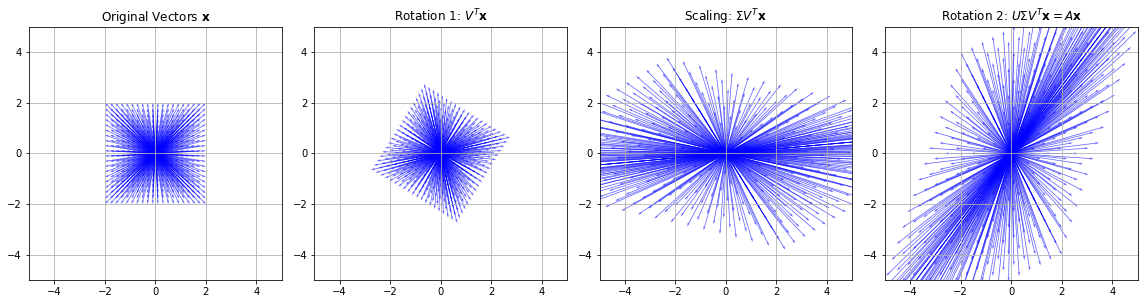

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of vectors (2D plane)
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
vectors = np.stack([X.ravel(), Y.ravel()], axis=0)

# Define a matrix A (non-symmetric, non-orthogonal)
A = np.array([[2, 1],
              [1, 3]])

# Compute SVD: A = U Σ V^T
U, S, VT = np.linalg.svd(A)
Sigma = np.diag(S)

# Decompose transformations
V = VT.T
rotation1 = V
scaling = Sigma
rotation2 = U

# Apply transformations step-by-step
V_vectors = rotation1 @ vectors
S_vectors = scaling @ V_vectors
U_vectors = rotation2 @ S_vectors  # Final result: A @ vectors

# Plotting setup
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

def plot_vectors(ax, vecs, title):
    ax.quiver(np.zeros_like(vecs[0]), np.zeros_like(vecs[1]),
              vecs[0], vecs[1], angles='xy', scale_units='xy', scale=1,
              color='blue', alpha=0.6)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.grid(True)

# Plot each step
plot_vectors(axs[0], vectors, "Original Vectors $\mathbf{x}$")
plot_vectors(axs[1], V_vectors, "Rotation 1: $V^T\mathbf{x}$")
plot_vectors(axs[2], S_vectors, "Scaling: $\Sigma V^T\mathbf{x}$")
plot_vectors(axs[3], U_vectors, "Rotation 2: $U\Sigma V^T\mathbf{x}=A \mathbf{x}$")

plt.tight_layout()
plt.show()
